In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("moeed.csv")
dataset.head(5)

,Temperature (°C),Humidity (%),Seismic Activity (Richter),Rainfall (mm),Disaster Type,Risk Category
0,26.9,82,5.9,268.8,Earthquake,Moderate Risk
1,47.4,59,5.5,263.6,Earthquake,Moderate Risk
2,42.9,84,0.3,90.0,Wildfire,Low Risk
3,31.9,61,1.2,187.9,Flood,High Risk
4,24.5,100,5.2,276.9,Earthquake,Moderate Risk


In [133]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temperature (°C)            500 non-null    float64
 1   Humidity (%)                500 non-null    int64  
 2   Seismic Activity (Richter)  500 non-null    float64
 3   Rainfall (mm)               500 non-null    float64
 4   Disaster Type               500 non-null    object 
 5   Risk Category               500 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB


,Temperature (°C),Humidity (%),Seismic Activity (Richter),Rainfall (mm)
count,500.000000,500.000000,500.000000,500.000000
mean,32.494600,60.016000,4.083000,152.296000
std,10.313829,23.363721,2.275832,85.473632
min,15.100000,20.000000,0.000000,0.700000
25%,23.500000,40.000000,2.175000,75.200000
50%,32.250000,59.500000,4.200000,157.950000
75%,41.600000,81.000000,6.000000,225.850000
max,50.000000,100.000000,8.000000,297.800000


In [134]:
dataset.isnull().sum()

Temperature (°C)              0
Humidity (%)                  0
Seismic Activity (Richter)    0
Rainfall (mm)                 0
Disaster Type                 0
Risk Category                 0
dtype: int64

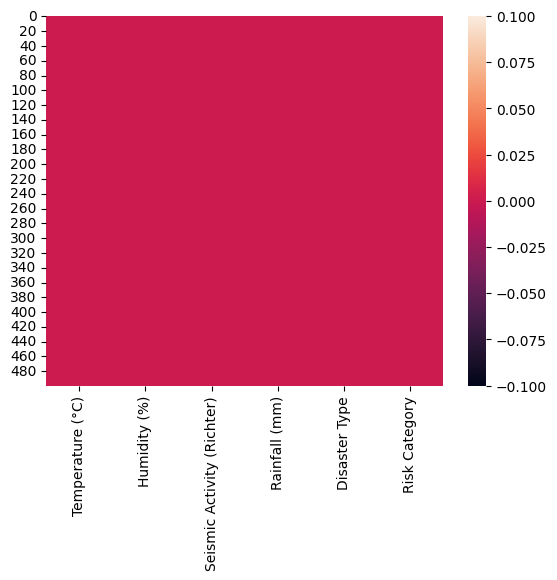

In [135]:
sns.heatmap(dataset.isnull())
plt.show()

In [136]:
dataset.head(4)

,Temperature (°C),Humidity (%),Seismic Activity (Richter),Rainfall (mm),Disaster Type,Risk Category
0,26.9,82,5.9,268.8,Earthquake,Moderate Risk
1,47.4,59,5.5,263.6,Earthquake,Moderate Risk
2,42.9,84,0.3,90.0,Wildfire,Low Risk
3,31.9,61,1.2,187.9,Flood,High Risk


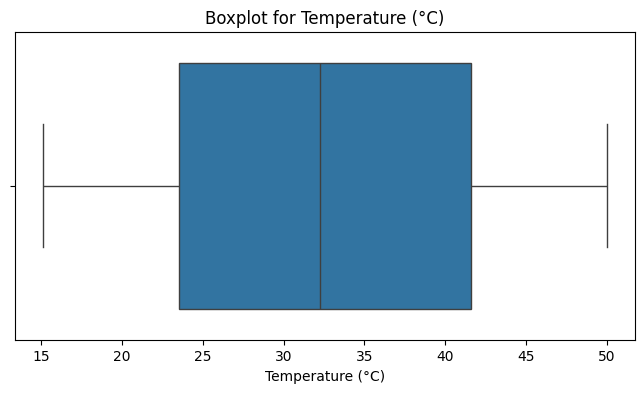

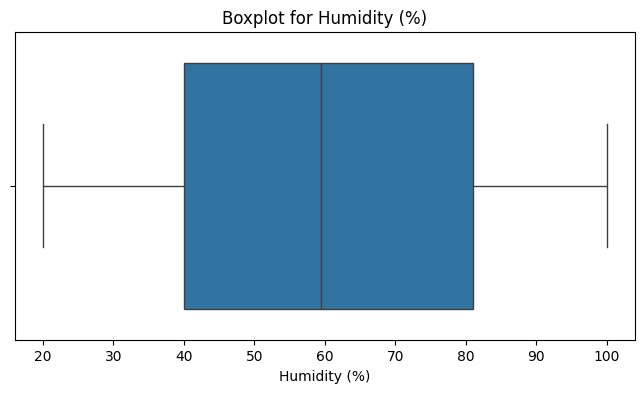

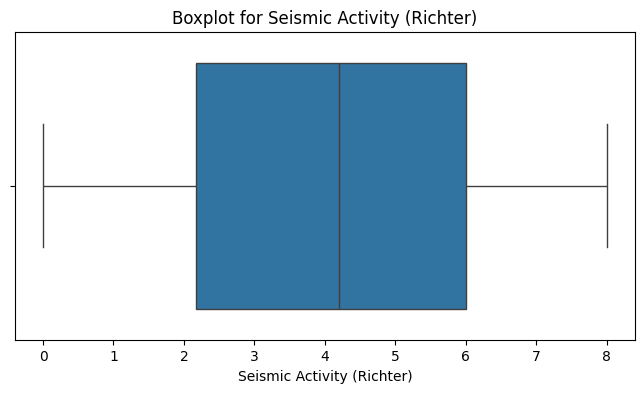

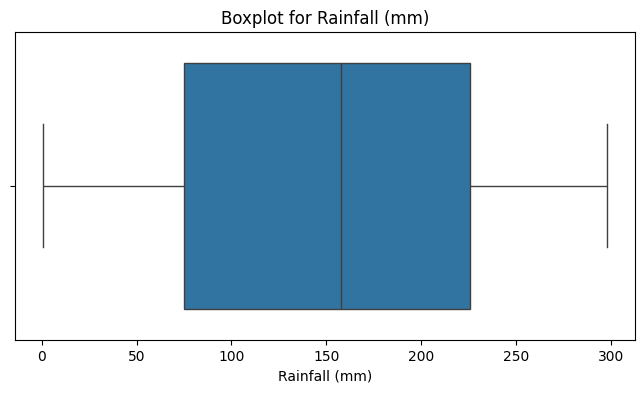

In [137]:
#outlier
# 
# Iterate over all numerical columns
for col in dataset.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[col],data=dataset)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [138]:
dataset.head(5)

,Temperature (°C),Humidity (%),Seismic Activity (Richter),Rainfall (mm),Disaster Type,Risk Category
0,26.9,82,5.9,268.8,Earthquake,Moderate Risk
1,47.4,59,5.5,263.6,Earthquake,Moderate Risk
2,42.9,84,0.3,90.0,Wildfire,Low Risk
3,31.9,61,1.2,187.9,Flood,High Risk
4,24.5,100,5.2,276.9,Earthquake,Moderate Risk


In [139]:
numerical_features = dataset.select_dtypes(include ="number")
numerical_features.head(5)

,Temperature (°C),Humidity (%),Seismic Activity (Richter),Rainfall (mm)
0,26.9,82,5.9,268.8
1,47.4,59,5.5,263.6
2,42.9,84,0.3,90.0
3,31.9,61,1.2,187.9
4,24.5,100,5.2,276.9


In [140]:
categorical_features = dataset.select_dtypes(include ="object")
categorical_features.head(5)

,Disaster Type,Risk Category
0,Earthquake,Moderate Risk
1,Earthquake,Moderate Risk
2,Wildfire,Low Risk
3,Flood,High Risk
4,Earthquake,Moderate Risk


In [141]:
from sklearn.preprocessing import LabelEncoder
for col in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    le.fit(dataset[col])
    dataset[col] = le.transform(dataset[col])
# print(hello)
    #print(dataset[col].unique())
    print(pd.DataFrame({'Original': le.classes_, 'Encoded': range(len(le.classes_))}))
    
#le.classes_ gives you the original values.
#range(len(le.classes_)) provides the corresponding encoded labels.


     Original  Encoded
0  Earthquake        0
1       Flood        1
2    Wildfire        2
        Original  Encoded
0      High Risk        0
1       Low Risk        1
2  Moderate Risk        2


In [142]:
dataset.head(3)

,Temperature (°C),Humidity (%),Seismic Activity (Richter),Rainfall (mm),Disaster Type,Risk Category
0,26.9,82,5.9,268.8,0,2
1,47.4,59,5.5,263.6,0,2
2,42.9,84,0.3,90.0,2,1


In [143]:
# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['Temperature (°C)', 'Humidity (%)','Seismic Activity (Richter)', 'Rainfall (mm)']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])
dataset[numerical_features]

,Temperature (°C),Humidity (%),Seismic Activity (Richter),Rainfall (mm)
0,0.338109,0.7750,0.7375,0.902390
1,0.925501,0.4875,0.6875,0.884887
2,0.796562,0.8000,0.0375,0.300572
3,0.481375,0.5125,0.1500,0.630091
4,0.269341,1.0000,0.6500,0.929653
...,...,...,...,...
495,0.180516,0.5125,0.4125,0.921912
496,0.034384,0.9875,0.5750,0.100640
497,0.948424,0.8500,0.1750,0.586335
498,0.704871,0.1000,0.5250,0.446988


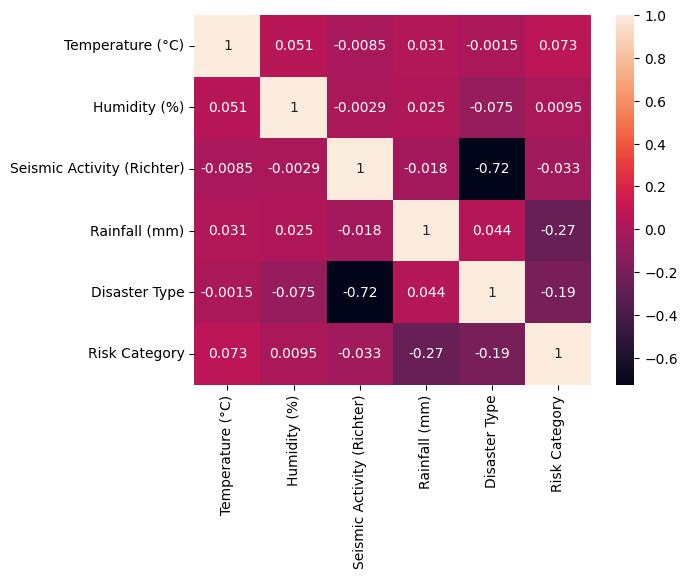

In [144]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [145]:
from sklearn.model_selection import train_test_split
X = dataset[numerical_features]
y = dataset[["Disaster Type","Risk Category"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

Hyperparameters Explanation:
max_depth: Reduces the depth of the tree. A smaller depth makes the model less complex.
min_samples_split: Prevents splits if there are fewer than this number of samples at a node.
min_samples_leaf: Ensures that each leaf has at least this number of samples, reducing overfitting.
max_leaf_nodes: Limits the total number of leaf nodes in the tree

In [146]:

from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier()
multi_output_model = MultiOutputClassifier(rf)

# Train the model
multi_output_model.fit(X_train,y_train)














MultiOutputClassifier(estimator=RandomForestClassifier())

In [147]:
multi_output_model.score(X_train,y_train)*100
# multi_model.score(X_train,y_train)*100


100.0

In [148]:
multi_output_model.score(X_test,y_test)*100
# multi_model.score(X_test,y_test)*100

88.0

In [149]:
multi_output_model.predict([[0.338109,	0.7750	,0.7375,	0.902390]])

c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0, 2]])

In [150]:


# Predict the labels for the test set
y_pred = multi_output_model.predict(X_test)


from sklearn.metrics import classification_report

# Assuming y_test and y_pred are multi-output arrays or DataFrames
for i, col in enumerate(y_test.columns):  # Iterate through each output column
    print(f"Metrics for Output {i + 1}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))







Metrics for Output 1:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        78
           1       0.92      0.95      0.94        64
           2       0.25      0.12      0.17         8

    accuracy                           0.91       150
   macro avg       0.70      0.68      0.68       150
weighted avg       0.90      0.91      0.90       150

Metrics for Output 2:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        78
           1       0.90      1.00      0.95        18
           2       0.95      0.96      0.95        54

    accuracy                           0.97       150
   macro avg       0.95      0.97      0.96       150
weighted avg       0.97      0.97      0.97       150

